In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import kmeans, vq
from scipy.cluster.vq import whiten

## Hierarchical clustering: ward method

### It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

### The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

-    Import fcluster and linkage from scipy.cluster.hierarchy.
-    Use the ward method in the linkage() function.
-    Assign cluster labels by forming 2 flat clusters from distance_matrix.
-    Run the plotting code to see the results.

In [2]:
x =  [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]
y = [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]

comic_con = pd.DataFrame({"x_coordinate": x,
                         "y_coordinate": y
                         })
comic_con['x_coordinate'] = comic_con['x_coordinate'].astype('float32')
comic_con['y_coordinate'] = comic_con['y_coordinate'].astype('float32')

comic_con["x_scaled"] = whiten(comic_con["x_coordinate"])
comic_con["y_scaled"] = whiten(comic_con["y_coordinate"])

centroids,_ = kmeans(comic_con[["x_scaled", "y_scaled"]], 2)
comic_con['cluster_labels'], _ = vq(comic_con[["x_scaled", "y_scaled"]], centroids)

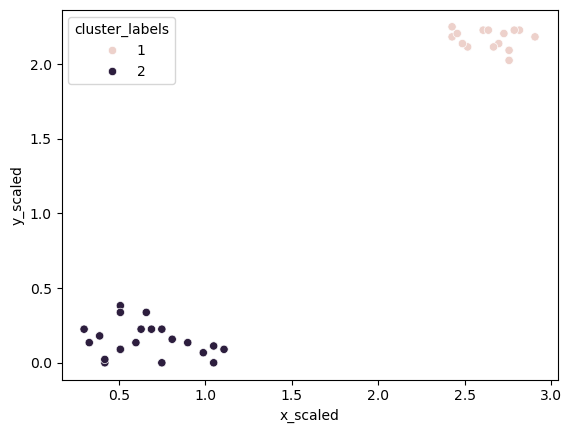

In [3]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, t=2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Hierarchical clustering: single method

### Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

### The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

-    Import fcluster and linkage from scipy.cluster.hierarchy.
-    Use the single method in the linkage() function.

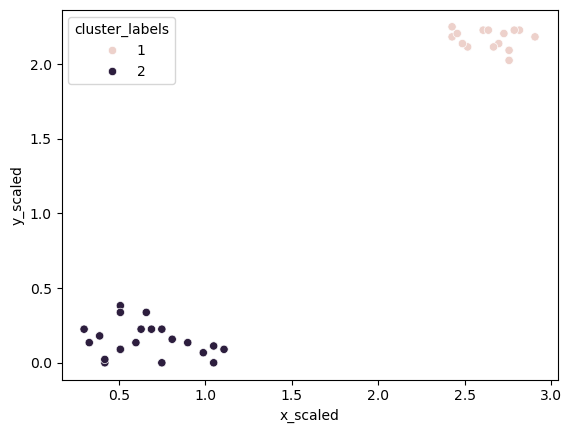

In [4]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, t=2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Hierarchical clustering: complete method

### For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

### The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

-    Import fcluster and linkage from scipy.cluster.hierarchy.
-    Use the complete method in the .linkage() function.

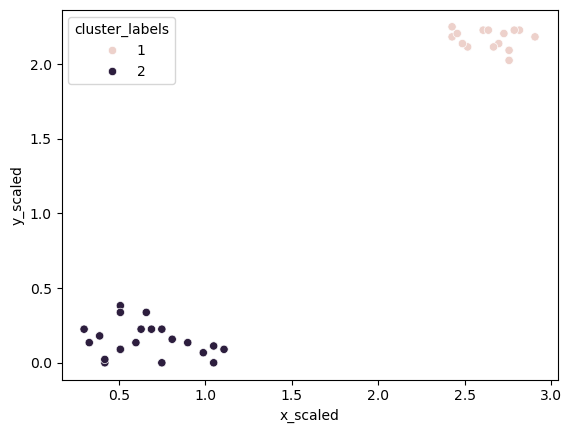

In [5]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method="complete", metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, t=2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## Visualize clusters with matplotlib
### We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

### The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

### Instructions
-    Import the pyplot class from matplotlib module as plt.
-    Define a colors dictionary for two cluster labels, 1 and 2.
-    Plot a scatter plot with colors for each cluster as defined by the colors dictionary.

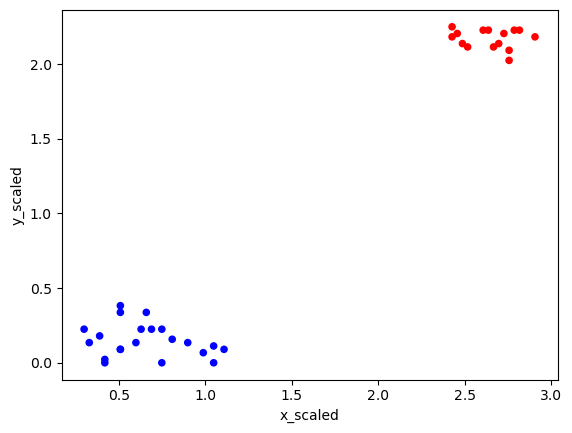

In [6]:
# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

## Visualize clusters with seaborn
### Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild hue function for cluster labels.

### The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

### Instructions
-    Import the seaborn module as sns.
-    Plot a scatter plot using the .scatterplot() method of seaborn, with the cluster labels as the hue argument.

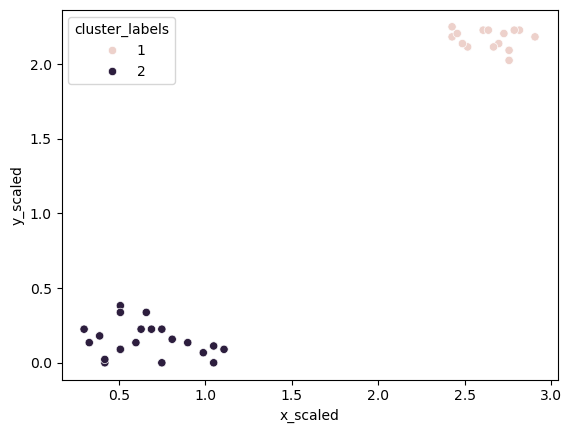

In [7]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x="x_scaled", 
                y="y_scaled", 
                hue="cluster_labels", 
                data = comic_con)
plt.show()

## Create a dendrogram
### Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

### The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

### Instructions
-    Import the dendrogram function from scipy.cluster.hierarchy.
-    Create a dendrogram using the linkage object.
-    Display the dendrogram using .show() method of the plt object.

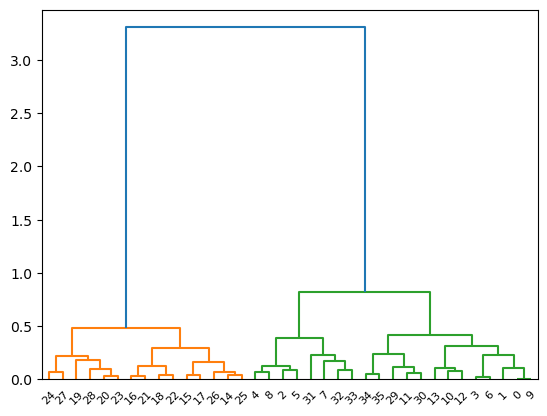

In [8]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

## FIFA 18: exploring defenders
### In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:
-    sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
-    aggression: a number between 0-99 which signifies the commitment and will of a player

### These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

### This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.

### The following modules are pre-loaded: dendrogram, linkage, fcluster from scipy.cluster.hierarchy, matplotlib.pyplot as plt, seaborn as sns. The data is stored in a pandas DataFrame, fifa.

### Instructions 1/4
-    Fit the scaled data in columns scaled_sliding_tackle and scaled_aggression into a hierarchical clustering algorithm. Additionally, you may want to check how long it takes to run the data in the IPython Shell using the timeit module.

In [9]:
fifa = pd.read_csv("../../data/fifa_18_sample_data.csv")

fifa['sliding_tackle'] = fifa['sliding_tackle'].astype('float32')
fifa['aggression']     = fifa['aggression'].astype('float32')
fifa["scaled_sliding_tackle"] = whiten(fifa["sliding_tackle"])
fifa["scaled_aggression"]     = whiten(fifa["aggression"])


In [10]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[["scaled_sliding_tackle", "scaled_aggression"]], 'ward')

### Instructions 2/4
-    Assign cluster labels to each row in the data using the fcluster() function (use 3 clusters).

In [11]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, t=3, criterion='maxclust')

### Instructions 3/4
-    Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.

In [12]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby("cluster_labels").mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.938422           4.388834
2                            0.579966           1.766698
3                            1.362950           3.448835


### Instructions 4/4
-    Create a scatter plot using seaborn with the scaled_sliding_tackle attribute on the x-axis and the scaled_aggression attribute on the y-axis. Assign a different color to each cluster.

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.938422           4.388834
2                            0.579966           1.766698
3                            1.362950           3.448835


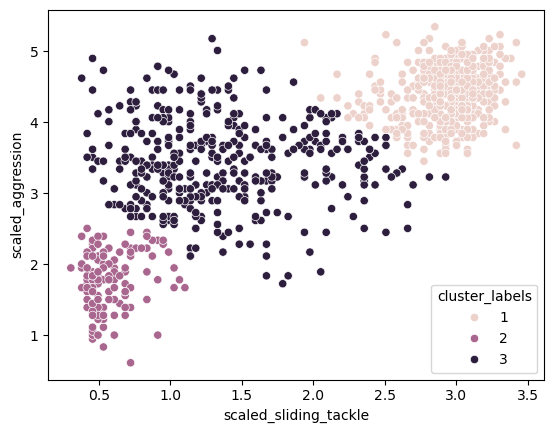

In [13]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()